# Lab: Central Limit Theorem

Authors: Yuna Liu and Kun Han

Date: 2022/1/21

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as scs
from scipy.stats import norm
sns.set()

## Uppgifter 1

In this exercise, we generate random variable $X$ for different sample sizes and simulate for 1000 times to calculate the mean $\bar X$ and standardlized sample mean. As changing the sample sizes, we observe and compare the histograms and curves by using Central Limit Theorem. Expected mean value $\mu_{\bar X}$, standard devition $\sigma_{\bar X}$ and confidence interval will be calculated and hypothesis will be discussed.

1) Vi ska alltså skapa observationer av stickprovsmedelvärden ${\bar x}$
Hur ska du göra/skriva i Python för att få observationer av stickprovsmedelvärden baserade på fem observationer av slumpvariabler? Svara gärna med hjälp av en skärmdump och förklarande text.

In [2]:
# Create a uniformly distributed discrete random variable X of five observations
# which take values 4, 5, 6, 7
# we then calculate the mean X_bar for these five observations and save as x_bar_5

sample_5=np.random.randint(4,8,5)
x_bar_5=sample_5.mean()
sample_5, x_bar_5

(array([7, 6, 4, 4, 7]), 5.6)

2) Skapa 1000 standardiserade stickprovsmedelvärden, vart och ett baserat på 2 observationer av slumpvariabler, och gör histogram för de 1000 standardiserade stickprovsmedelvärdena. Upprepa proceduren för stickprovsstorlekarna 10, 20, 30 och 50. 

In [3]:
# calculate the population mean my
my = (4+5+6+7)/4

# standard deviation of population: sigma
sigma = np.sqrt((1/4)*(4-my)**2 + (1/4)*(5-my)**2 + (1/4)*(6-my)**2 + (1/4)*(7-my)**2).round(2)

def CLT_test_discrete(sample_size, N_samples):
    "Define a function for sample size and the number of loops"
    "Return the histogram figures"
    "Add a standard normal curve in red over the histogram"
    
    sample_mean = lambda sample_size:np.mean(np.random.randint(4,8,sample_size)) # function for sample mean
    standlized_samples = [(sample_mean(sample_size)-my)/(sigma/np.sqrt(sample_size)) for i in range(N_samples)] # loop for standlized samples
    
    plt.rcParams["figure.figsize"] = (15,10)
    fig, ax = plt.subplots()
    x= np.arange(-4,4,0.0001)
    ax.set_title(f'Histogram of discrete uniform distribution of n= {sample_size}',fontname='Sans Serif',fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel('Standardized Sample Mean',fontsize=20,fontname='Sans Serif')
    ax.set_ylabel('Density')
    ax.plot(x, norm.pdf(x,0,1), color='red')
    sns.distplot(standlized_samples, bins=20)
    #ax.grid(True)
    #ax.set_ylim(0,0.0002)
    ax.axes.get_yaxis().set_visible(False)
    #plt.show()


C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


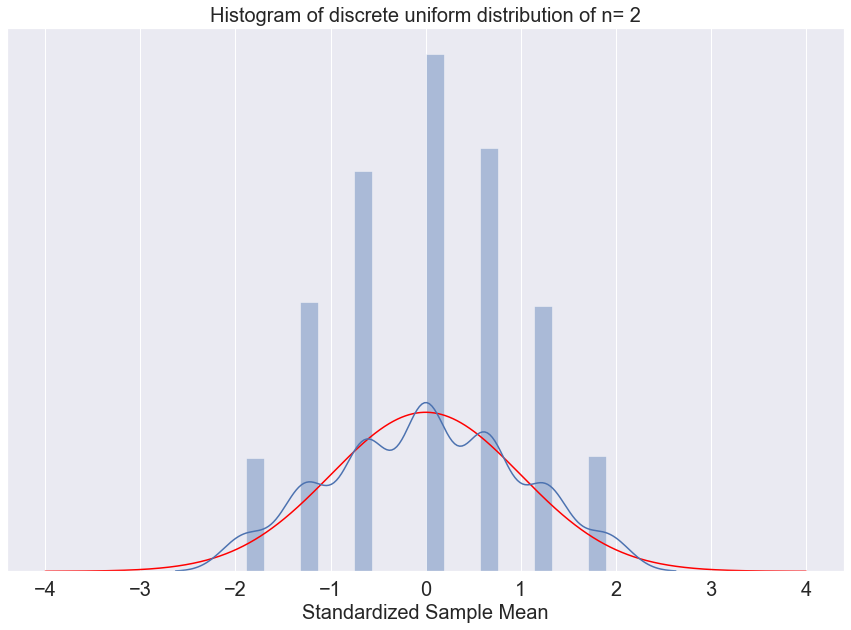

In [4]:
CLT_test_discrete(2,1000)

When using the sample size of 2, the sample mean tend to be near our standardized mean 0. However, the curve is not seems to be normal distributed.

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


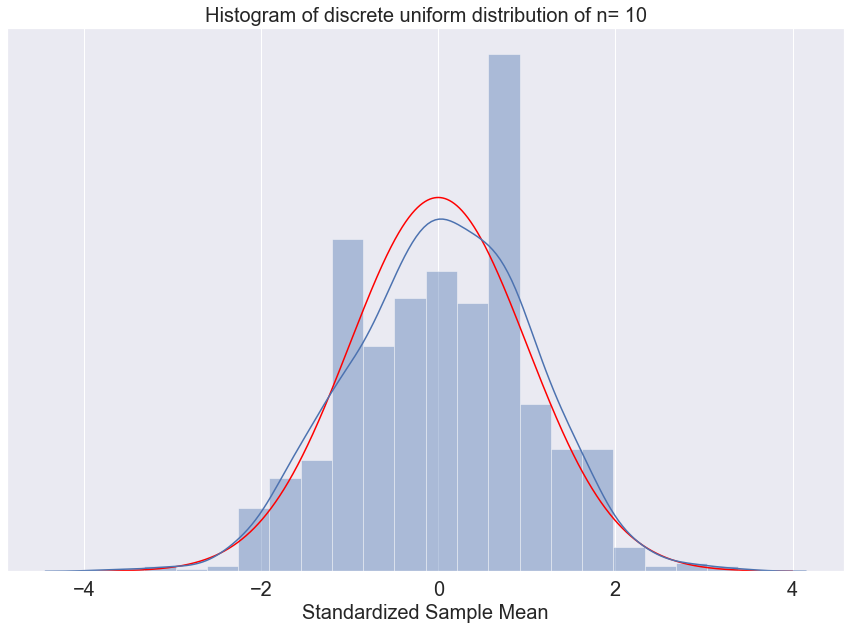

In [5]:
CLT_test_discrete(10,1000)

The shape become more smoothy.

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


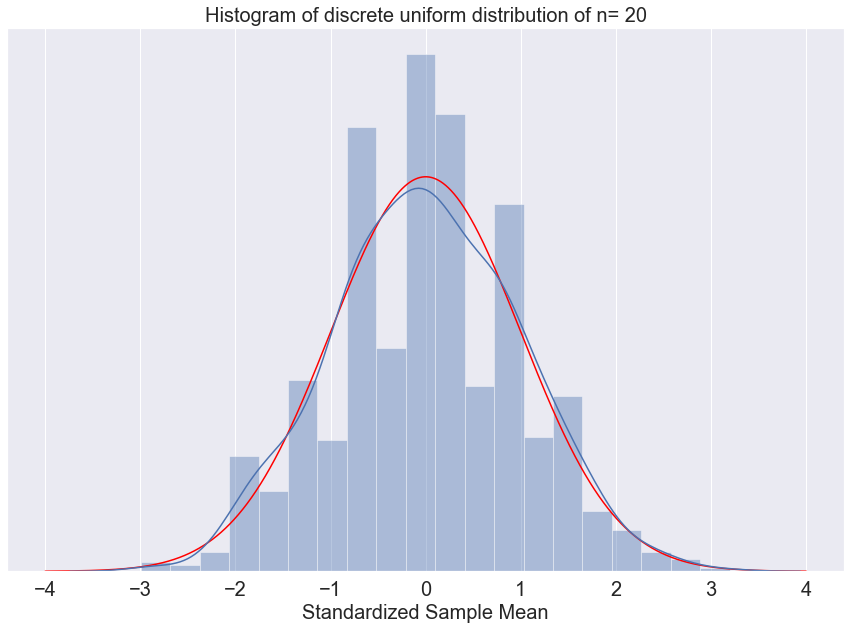

In [6]:
CLT_test_discrete(20,1000)

The curve perform better to be normal distributed when we adjust the sample size to 20.

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


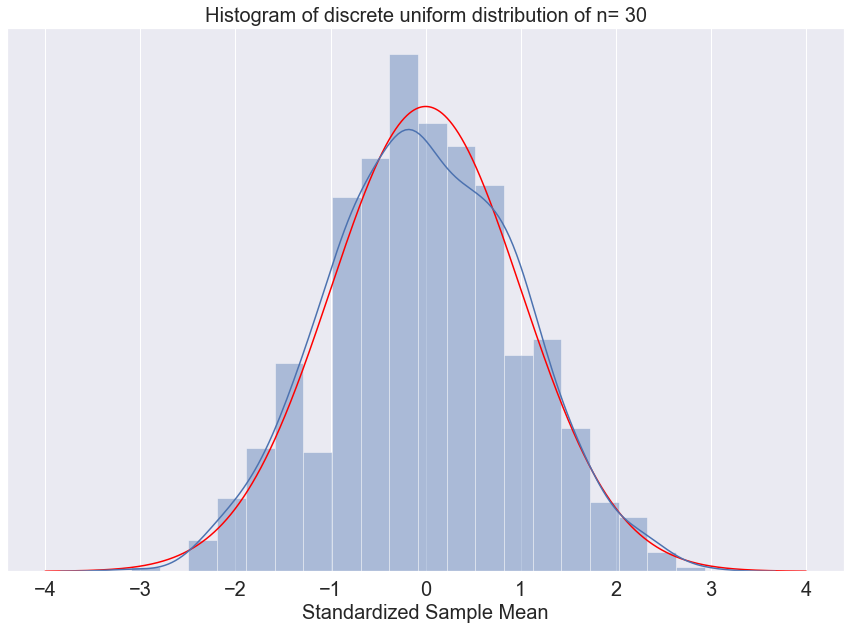

In [7]:
CLT_test_discrete(30,1000)

The more samples we take, the more likely that the sampling distribution of the mean will be narmal distributed.

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


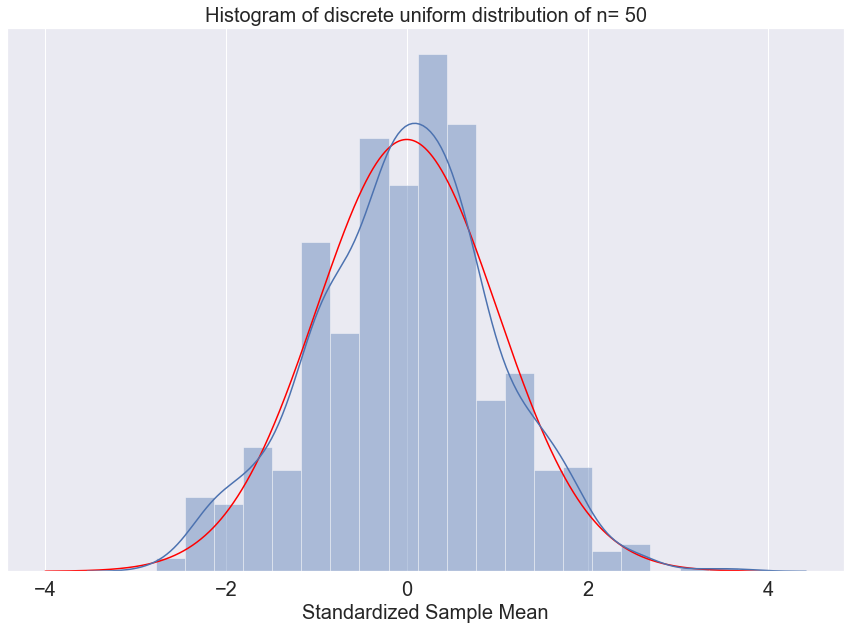

In [8]:
CLT_test_discrete(50,1000)

3) Hur beräknar du $\mu_{\bar X}$ i 2)? (Svara med en formel, uträkning baserad på formeln och ett numeriskt svar)
4) Hur beräknar du $\sigma_{\bar X}$ i 2)? (Svara med en formel, uträkning baserad på formeln och ett numeriskt svar)

<h3>Expected mean and standard deviation can be calculated by:</h3>

$ \mu_{\bar X} = E(X) = \frac{1}{n}\sum_{i=1}^{n} X_i$ 

$\sigma_{\bar X} = \sqrt{V(X)} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(X_i - \mu_{\bar X})^2}$

where $ X_i$ is the observations in population

5) Vad händer med fördelningen för de standardiserade stickprovsmedelvärdena då antalet observationer som stickprovsmedelvärdena baseras på ökar? Finns det något teoretiskt stöd för detta och i så fall vilket?

From the previous figures, we found that the distribution of the standarized sample mean trends to be normal distribution(informally a " bell curve " with mean equal to 0) as n becomes larger. The underlying theorem is Central Limit Theorem. As n is large, the distribution of the standarized sample mean becomes normal distribution even if the original variable is not normal distribution.

6)  Gör 1000 95%-konfidensintervall för populationsmedelvärdet μ, vart och ett baserat på 50 observationer av slumpvariabler. Hur många av dessa täcker populationsmedelvärdet? Är detta vad du förväntade dig? Motivera? 

### Confidence interval can be calculate by equation:

${\bar x}\pm Z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$

Because the standard diviation of population $\sigma$ is known

In [9]:
N_samples=1000
sample_size=50
count=0

for x in range(N_samples):
    sample_n=np.random.randint(4,8,sample_size)
    x_bar_n=sample_n.mean()
    #create 95% confidence interval for population mean
    # scs.norm.ppf(.975).round(2) is 1.96
    z_critical_value = scs.norm.ppf(1-.05/2).round(2)
    up_limit = x_bar_n + z_critical_value*sigma/np.sqrt(sample_size)
    down_limit = x_bar_n - z_critical_value*sigma/np.sqrt(sample_size)
    if down_limit < my < up_limit:
        count += 1 
print(f'For {count} of 1000 times, the confidence interval includes the population mean, which is a proportion of {count/N_samples*100:.2f}%')

For 955 of 1000 times, the confidence interval includes the population mean, which is a proportion of 95.50%


Around 95% of times does the population mean fall into in the confidence interval. This expectation is approximately the same as the test result.

7) Antag att vi vill göra hypotestest för populationsmedelvärdet med

$H_0: \mu \leq 5.1$

$H_A: \mu > 5.1$

Testet ska utföras på signifikansnivån 0.05 och med stickprovsstorleken 50. Med hjälp av de 1000 raderna och 50 kolonnerna med observerade slumpvariabler vill vi undersöka testets styrka genom att utföra testet 1000 gånger. Vad blir styrkan, dvs hur stor andel av testerna förkastar den falska nollhypotesen? 

Now suppose we want to do a hypothesis test for the population mean with
Here the population $\sigma$ is known so we need calculate the $z$ value and $P$-value:

$z = \frac {\bar x - \mu} {\sigma /\sqrt{n}}$

Because it is a one side test, so $P$-value will be $P(Z>z)$

In [10]:
# Styrka= P(H0 förkastas | H0 är falsk)
# my = 5.5 > 5.1 så H0 är falsk i denna uppgifter
# the goal is to count how many times the test reject H0

N_samples=1000
sample_size=50
count=0


for x in range(N_samples):
    sample_n=np.random.randint(4,8,sample_size)
    x_bar_n=sample_n.mean()

    test = (x_bar_n-5.1)/(sigma/np.sqrt(sample_size)) # Z value

    # P(Z>test) = 1- P(Z<=test)
    p_värde = 1- scs.norm.cdf(test) 

    if p_värde < 0.05: # p_value is smaller than significant value 0.05, reject H0.
        count += 1 

print(f'The styrka is {count/1000*100:.2f}%, which means the probability of noll hypothesis to be rejected when H0 is wrong is {count/1000*100:.2f}% .')

The styrka is 81.30%, which means the probability of noll hypothesis to be rejected when H0 is wrong is 81.30% .


## Uppgifter 2

Syftet med den här uppgiften är att belysa det vanliga misstaget att tro att bara för att man får stora stickprov så blir data normalfördelade. Vad CGS säger är ju att om stickproven blir stora så blir stickprovsmedelvärdena/stickprovsproportionerna normalfördelade! I den här uppgiften kommer du att skapa stickprovsdatadata av olika storlekar. Du ska använda slumptal som är kontinuerligt likformigt fördelade på intervallet [7,11]. Sådana slumptal kan genereras med numpy.random.uniform. Nedan kallar vi dessa bara slumptal.

8)	Generera 200 stickprov av storlek fem och gör ett histogram av alla 1000 observationerna. Tyder histogrammet på att data är normalfördelade?*

In [11]:
def histogram_continous_uniform(sample_size, N_of_samples):
    "Define an array for N_of_samples samples, each sample size of sample_size"
    "Return the histogram figures"
    "Add a standard normal curve in red over the histogram"

    samples_n = np.zeros((N_of_samples,sample_size)) 
    #Defining parameters from our population distribution
    lo, hi = 7,11
    #Creating for loop
    for x in range(N_of_samples):
        samples_n[x] = np.random.uniform(lo, hi, sample_size)

    plt.rcParams["figure.figsize"] = (15,10)
    fig, ax = plt.subplots()
    x= np.arange(-4,4,0.0001)
    ax.set_title(f'Histogram of {N_of_samples} samples of continous uniform variable with n= {sample_size} per sample',fontname='Sans Serif',fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel('X',fontsize=20,fontname='Sans Serif')
    ax.set_ylabel('Density')
    ax.plot(x, norm.pdf(x,0,1), color='red')
    sns.distplot(samples_n, bins=20)
    #ax.grid(True)
    #ax.set_ylim(0,0.0002)
    ax.axes.get_yaxis().set_visible(False)
    #plt.show()


C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


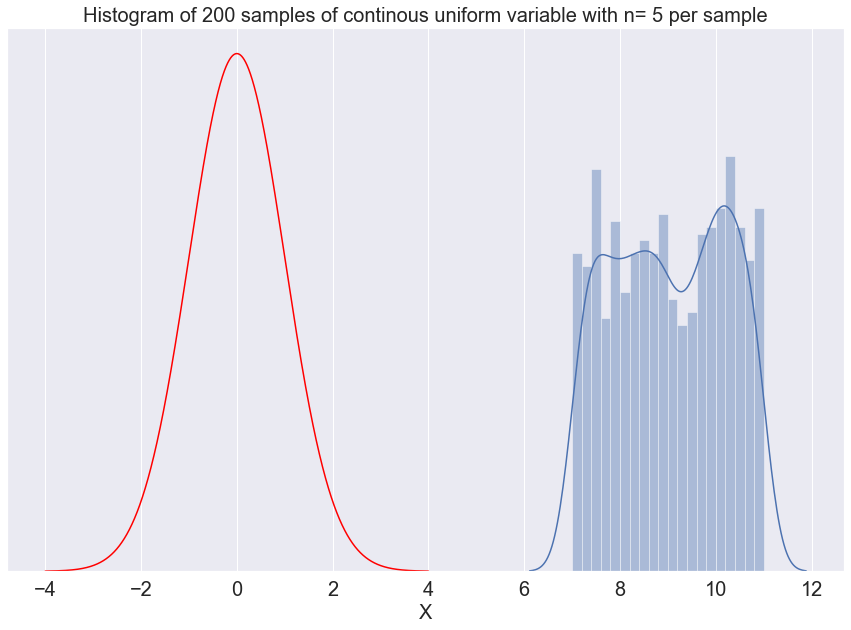

In [12]:
histogram_continous_uniform(5, 200)

No, the histogram shows that the sample means are not normally distributed. Because we can see that the blue and red curves locate very far away to each other.

The figure shows that these 1000 observations are not normally distributed.

9)	Skapa 200 standardiserade medelvärden vart och ett baserat på stickprov av storlek fem genererade i uppgift 8 och skapa ett histogram av dessa medelvärden. Tyder histogrammet på att medelvärdena är normalfördelade?*

In [13]:
def histogram_continous_uniform_standarized(sample_size, N_of_samples):
    "Define an array for N_of_samples samples, each sample size of sample_size"
    "Return the histogram figures"
    "Add a standard normal curve in red over the histogram"

    # n is the sample_size, and samples stands for the number of samples
    # Define an array for N_of_samples samples per sample size of sample_size

    samples_n = np.zeros((N_of_samples,sample_size))

    #Defining parameters from our population distribution
    lo, hi = 7,11

    # We calculate the population mean my
    my = (hi+lo)/2

    # We calculate the population standard deviation sigma
    sigma = (hi-lo)/np.sqrt(12).round(2)

    # We create a X variable with n observations in each loop
    # We calculate the sample mean for this X variable as x_bar_n in each loop
    # Loop for number of samples times, we save x_bar_n to x_bars_n during each loop
    # After that, we plot the distribution of x_bars_n

    x_bars_n=np.zeros(N_of_samples)

    for x in range(N_of_samples):
        sample_n=np.random.uniform(lo, hi, sample_size)
        x_bar_n=sample_n.mean()
        x_bars_n[x]= (x_bar_n-my)/(sigma/np.sqrt(sample_size))
    
    x_bars_n
  
    plt.rcParams["figure.figsize"] = (15,10)
    fig, ax = plt.subplots()
    x= np.arange(-4,4,0.0001)
    ax.set_title(f'Histogram of {N_of_samples} samples of continous uniform variable with n= {sample_size} per sample',fontname='Sans Serif',fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel('Standardized Sample Mean',fontsize=20,fontname='Sans Serif')
    ax.set_ylabel('Density')
    ax.plot(x, norm.pdf(x,0,1), color='red')
    sns.distplot(x_bars_n, bins=20)
    #ax.grid(True)
    #ax.set_ylim(0,0.0002)
    ax.axes.get_yaxis().set_visible(False)
    #plt.show()

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


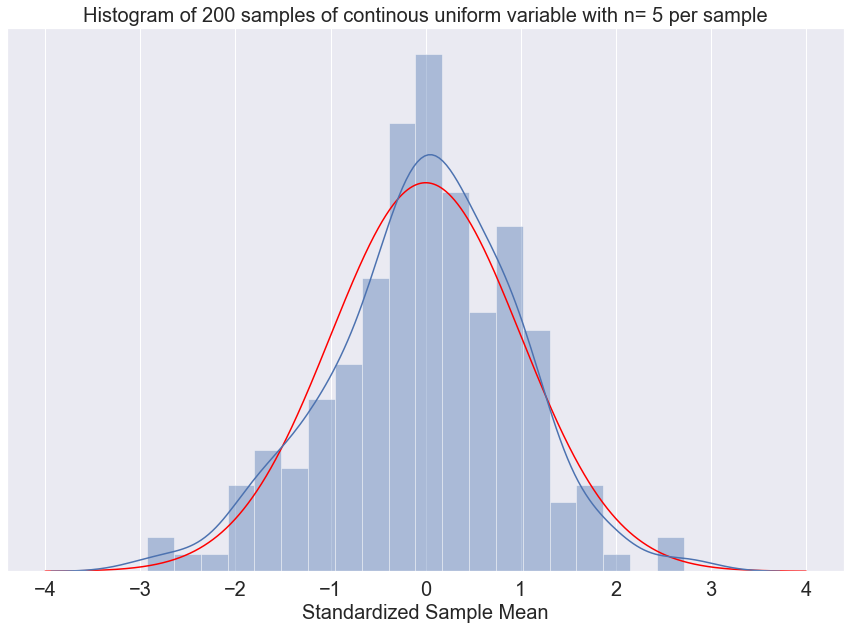

In [14]:
histogram_continous_uniform_standarized(5, 200)

The histogram is not normally distributed.

10) Hur beräknar du μ_X ̅  i 9)? (Svara med en formel, uträkning baserad på formeln och ett numeriskt svar)
**TODO** Formular

11) Hur beräknar du σ_X ̅  i 9)? (Svara med en formel, uträkning baserad på formeln och ett numeriskt svar)
**TODO** Formular

12) Generera 200 stickprov av storlek 20 och gör ett histogram av alla 4000 observationerna. Tyder histogrammet på att data är normalfördelade?*

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


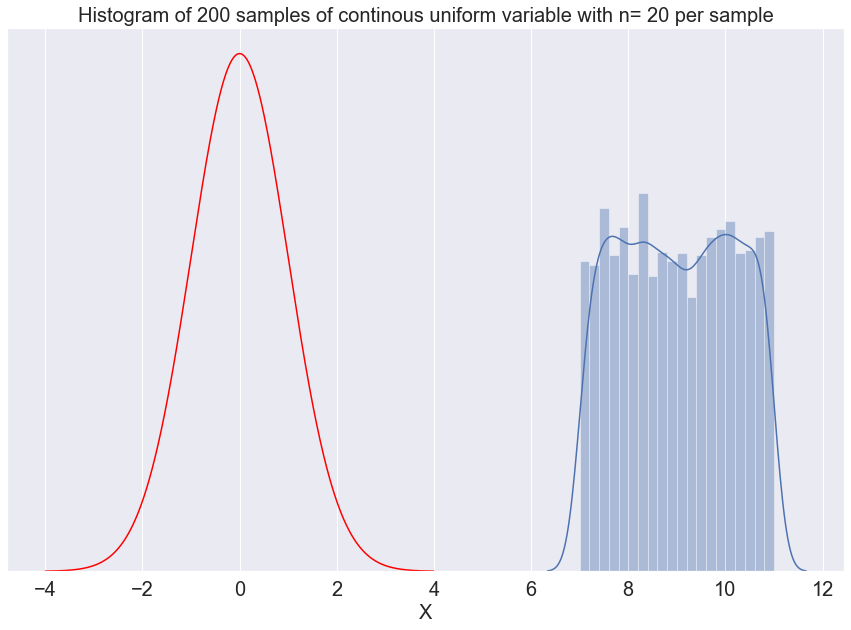

In [15]:
histogram_continous_uniform(20, 200)

No, the histogram shows that the sample means are not normally distributed. Because we can see that the blue and red curves locate very far away to each other.

13)	Skapa 200 standardiserade medelvärden vart och ett baserat på stickprov av storlek 20 genererade i uppgift 12 och skapa ett histogram av dessa medelvärden. Tyder histogrammet på att medelvärdena är normalfördelade?*

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


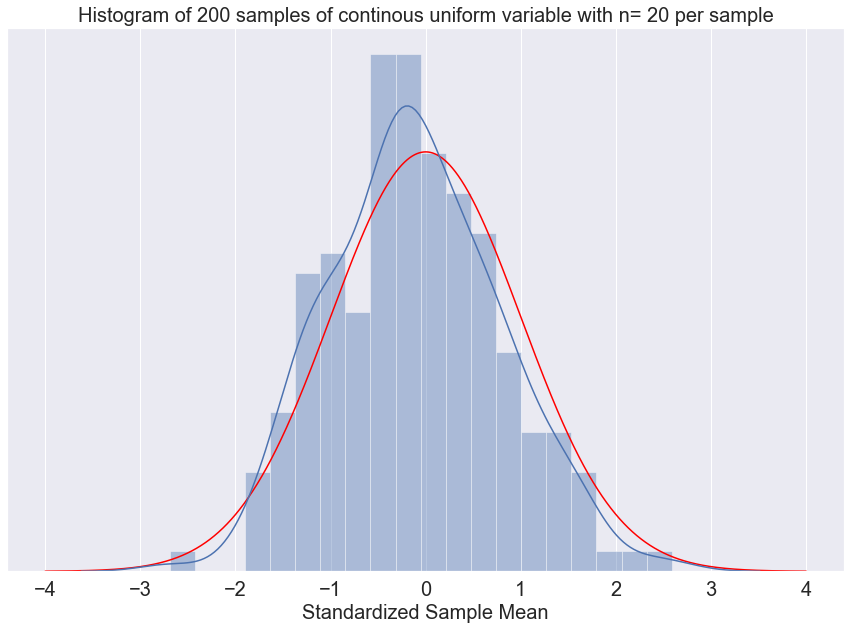

In [16]:
histogram_continous_uniform_standarized(20, 200)

No, the histogram is not normally distributed. The sample means located more in the central, and not in the tails, compare to normal distribution curve.

14)	Generera 200 stickprov av storlek 50 och gör ett histogram av alla 10000 observationerna. Tyder histogrammet på att data är normalfördelade?*

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


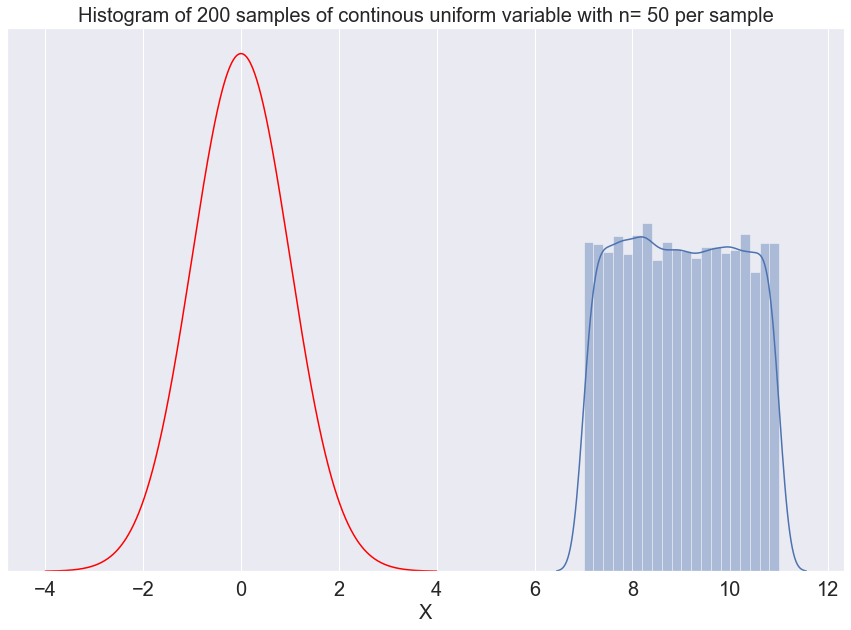

In [17]:
histogram_continous_uniform(50, 200)

No, the histogram shows that the sample means are not normally distributed. Because we can see that the blue and red curves locate very far away to each other.

15)	Skapa 200 standardiserade medelvärden vart och ett baserat på stickprov av storlek 50 genererade i uppgift 14 och skapa ett histogram av dessa medelvärden. Tyder histogrammet på att medelvärdena är normalfördelade?*

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


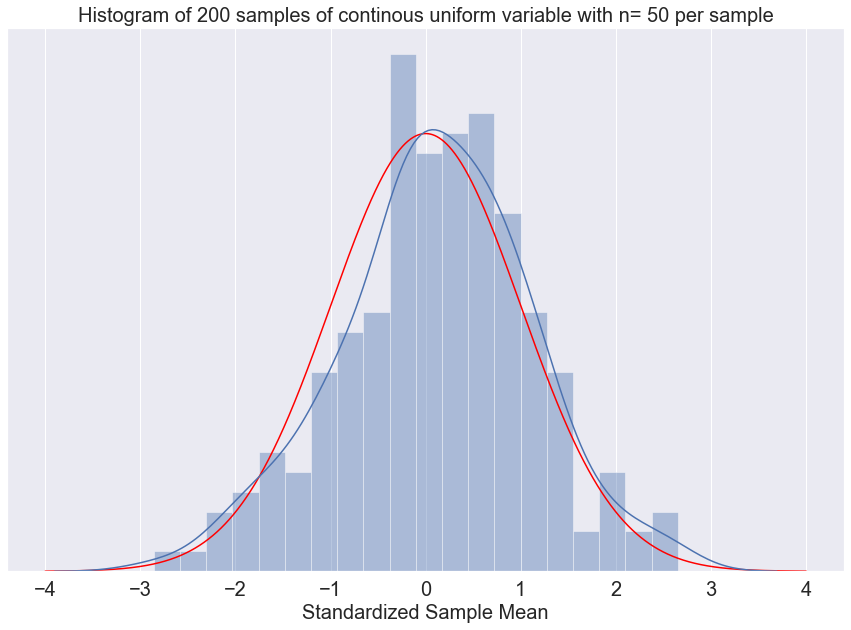

In [20]:
histogram_continous_uniform_standarized(50, 200)

Yes, the histogram shows that the sample means are normally distributed. Because we can see that the blue and red curves locate very close to each other and alike.